In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cleaned_hotel_data.csv")  # Use your actual file name

In [4]:
# Set target
y = df['is_canceled']

# Drop target and any other non-predictive columns
X = df.drop(columns=['is_canceled', 'reservation_status', 'reservation_status_date', 'arrival_date'])

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# Initialize and train
'''
Tried training without class balancing first but minority class performance was poor (see report below).

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

Without class balancing 
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     12674
           1       0.65      0.52      0.58      4805

    accuracy                           0.79     17479
   macro avg       0.74      0.71      0.72     17479
weighted avg       0.78      0.79      0.78     17479

Confusion Matrix:

[[11297  1377]
 [ 2293  2512]]

Applied class_weight='balanced' to improve it:
'''
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [7]:
# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.81      0.84     12674
           1       0.57      0.66      0.62      4805

    accuracy                           0.77     17479
   macro avg       0.72      0.74      0.73     17479
weighted avg       0.78      0.77      0.78     17479

Confusion Matrix:

[[10318  2356]
 [ 1618  3187]]


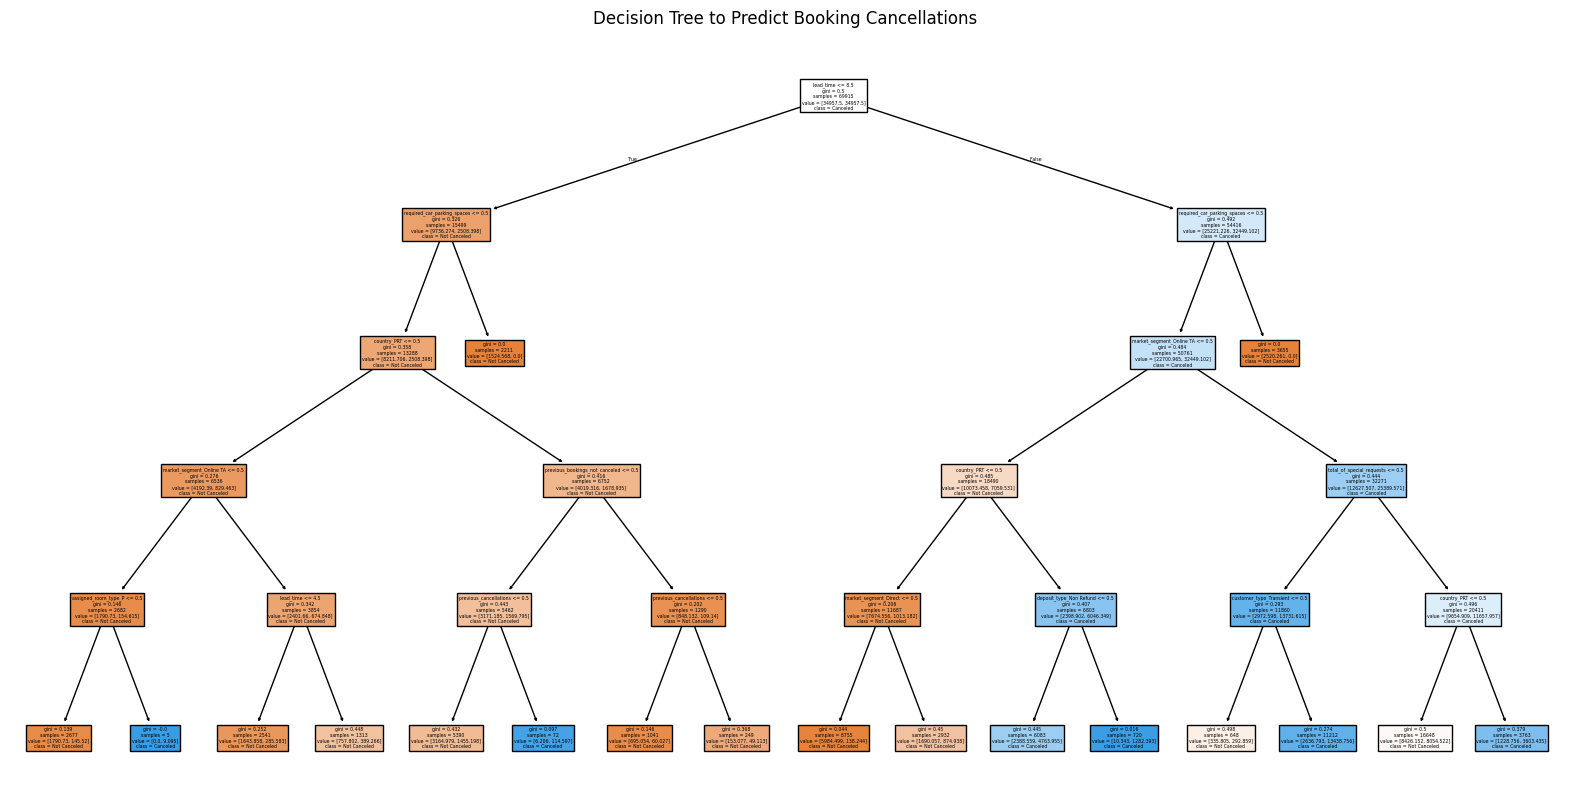

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Not Canceled", "Canceled"], filled=True)
plt.title("Decision Tree to Predict Booking Cancellations")
plt.show()

In [9]:
# Show top 10 important features
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances.head(10))

country_PRT                       0.302902
lead_time                         0.218428
required_car_parking_spaces       0.150222
market_segment_Online TA          0.131797
total_of_special_requests         0.117285
market_segment_Direct             0.030363
deposit_type_Non Refund           0.019256
customer_type_Transient           0.013721
previous_cancellations            0.008530
previous_bookings_not_canceled    0.006214
dtype: float64
